**Clustering Analysis of Music Track Dataset**

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, MDS
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

In [93]:
df = pd.read_csv("tracks.csv", index_col=0)
df = df.drop('track_genre', axis=1)
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (1500, 14)


In [94]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

In [95]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [96]:
k = 3

In [97]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [98]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [99]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete


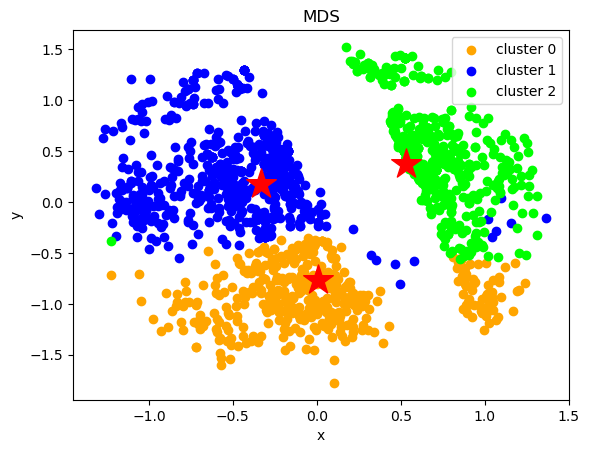

In [100]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [101]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


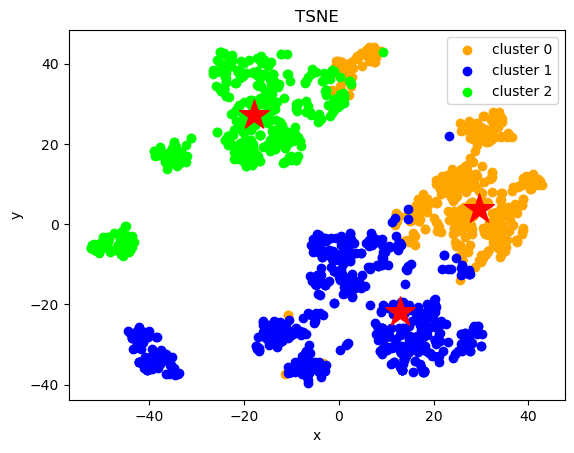

In [102]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [103]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [104]:
df.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
popularity,,,,,,,,,,,,,,,
85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.09330,0.000927,0.1150,0.166,100.966,4,1
49,215973,False,0.627,0.505,6,-12.659,1,0.0549,0.19700,0.014900,0.0583,0.146,100.005,4,1
65,188160,False,0.807,0.835,9,-6.849,0,0.0631,0.00148,0.527000,0.2330,0.349,124.979,4,2
59,233965,False,0.748,0.549,6,-5.447,0,0.0650,0.00268,0.792000,0.1960,0.197,101.033,4,2
55,187173,False,0.683,0.869,0,-4.828,1,0.0515,0.00088,0.836000,0.2060,0.219,123.983,4,1


In [105]:
df.tail()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
popularity,,,,,,,,,,,,,,,
23,352371,False,0.273,0.122,0,-22.173,0,0.0575,0.960,0.003330,0.0635,0.0731,117.718,4,0
22,204310,False,0.457,0.498,6,-8.387,1,0.0368,0.766,0.000002,0.2890,0.2020,116.255,4,0
23,225506,False,0.241,0.207,1,-16.353,1,0.0374,0.982,0.002260,0.1140,0.0735,86.885,1,0
23,148600,False,0.280,0.208,5,-20.158,1,0.0521,0.941,0.000200,0.4100,0.2410,90.477,4,0
23,257800,False,0.244,0.205,3,-15.596,1,0.0367,0.984,0.329000,0.0788,0.0750,71.370,4,0


In [106]:
df.groupby('cluster').mean()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,,,,
0,226790.365116,0.000000,0.309294,0.259449,4.767442,-14.605663,0.855814,0.044661,0.871512,0.217205,0.199045,0.203678,103.134105,3.665116
1,199980.618271,0.145188,0.640409,0.748157,4.690049,-5.619463,1.000000,0.089768,0.117714,0.185494,0.195895,0.456339,125.365556,3.969005
2,206810.516411,0.148796,0.625899,0.703247,5.776805,-6.001947,0.000000,0.091867,0.164083,0.093648,0.189492,0.438739,118.577667,3.962801


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

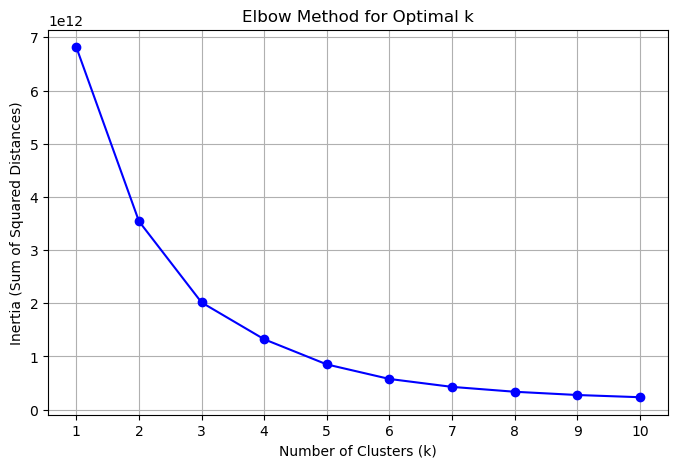

In [107]:
##Elbow method

##To figure out the best number of k to use, I will employ the use of the elbow method to measure the number for k at which adding more clusters doesnt significantly reduce the inetria

k_values = range(1, 11)  
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)  
    inertia_values.append(kmeans.inertia_)  

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_values)
plt.grid(True)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

Silhouette Scores for Different k values:
k = 2: 0.5463
k = 3: 0.5276
k = 4: 0.5279
k = 5: 0.5301
k = 6: 0.5299
k = 7: 0.5219
k = 8: 0.5390
k = 9: 0.5439
k = 10: 0.5436


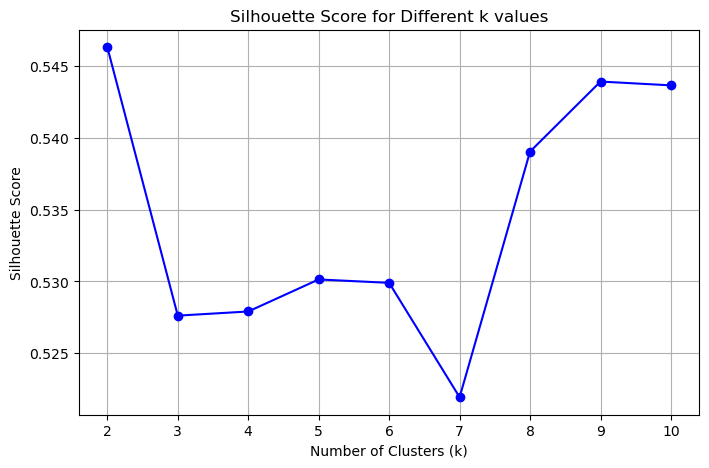

In [108]:

k_values = [2, 3, 4,5,6,7,8,9,10]  
silhouette_scores = {}


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df)  # Apply clustering
    silhouette_scores[k] = silhouette_score(df, cluster_labels)  # Compute silhouette score


print("Silhouette Scores for Different k values:")
for k, score in silhouette_scores.items():
    print(f"k = {k}: {score:.4f}")


plt.figure(figsize=(8, 5))
plt.plot(k_values, list(silhouette_scores.values()), marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k values")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [109]:
# Grid Search for K-means parameters
print("\n## Grid Search for K-means Parameter Optimization ##")


# Create a pipeline with preprocessing and K-means
kmeans_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(random_state=42))
])

# Define parameter grid
param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5, 6],
    'kmeans__init': ['k-means++', 'random'],
    'kmeans__n_init': [10, 20, 30],
    'kmeans__max_iter': [200, 300, 400]
}

# Define a custom scoring function based on negative inertia (to maximize)


def silhouette_scorer(estimator, X):
    labels = estimator.named_steps['kmeans'].labels_
    return silhouette_score(X, labels)

grid_search = GridSearchCV(
    kmeans_pipeline, 
    param_grid=param_grid, 
    scoring=make_scorer(silhouette_scorer),
    cv=5,
    n_jobs=-1  # Use all available cores
)

# Fit grid search
grid_search.fit(df)

# Get best parameters
print("Best parameters:", grid_search.best_params_)
print("Best silhouette score:", grid_search.best_score_)

# Use best parameters for final K-means model
best_k = grid_search.best_params_['kmeans__n_clusters']
best_init = grid_search.best_params_['kmeans__init']
best_n_init = grid_search.best_params_['kmeans__n_init']
best_max_iter = grid_search.best_params_['kmeans__max_iter']

print(f"Optimized K-means parameters: k={best_k}, init={best_init}, n_init={best_n_init}, max_iter={best_max_iter}")

# Re-run K-means with optimized parameters
optimized_kmeans = KMeans(
    n_clusters=best_k,
    init=best_init,
    n_init=best_n_init,
    max_iter=best_max_iter,
    random_state=42
)

optimized_cluster_labels = optimized_kmeans.fit_predict(df)
df['optimized_cluster'] = optimized_cluster_labels

# Calculate silhouette score with optimized parameters
optimized_silhouette = silhouette_score(df, optimized_cluster_labels)
print(f"Silhouette Score with optimized parameters: {optimized_silhouette:.4f}")


## Grid Search for K-means Parameter Optimization ##


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Best parameters: {'kmeans__init': 'k-means++', 'kmeans__max_iter': 200, 'kmeans__n_clusters': 2, 'kmeans__n_init': 10}
Best silhouette score: nan
Optimized K-means parameters: k=2, init=k-means++, n_init=10, max_iter=200


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Silhouette Score with optimized parameters: 0.5463


In [110]:
# In-depth K-means Cluster Description
print("\n## Detailed K-means Cluster Analysis ##")

# Calculate cluster statistics
cluster_stats = df.groupby('optimized_cluster').mean()
cluster_counts = df['optimized_cluster'].value_counts().sort_index()
cluster_percentages = (cluster_counts / len(df) * 100).round(2)

# Calculate standardized feature means to identify distinguishing features
def get_cluster_summary(cluster_id):
    # Get cluster data
    cluster_data = df[df['optimized_cluster'] == cluster_id].drop(columns=['optimized_cluster', 'cluster', 'DBSCAN_Cluster'], errors='ignore')
    
    # Calculate z-scores for each feature in this cluster vs. the overall dataset
    z_scores = {}
    for column in cluster_data.columns:
        cluster_mean = cluster_data[column].mean()
        overall_mean = df[column].mean()
        overall_std = df[column].std()
        z_scores[column] = (cluster_mean - overall_mean) / overall_std
    
    # Sort features by absolute z-score
    sorted_features = sorted(z_scores.items(), key=lambda x: abs(x[1]), reverse=True)
    
    # Get top 5 distinguishing features
    top_features = sorted_features[:5]
    
    # Generate text description
    description = [f"Cluster {cluster_id} ({cluster_percentages[cluster_id]}% of tracks):"]
    
    # Add distinctive characteristics
    description.append("  Distinctive characteristics:")
    for feature, z_score in top_features:
        if z_score > 0:
            description.append(f"    - High {feature} (z={z_score:.2f})")
        else:
            description.append(f"    - Low {feature} (z={z_score:.2f})")
    
    # Add musical interpretation
    description.append("  Musical interpretation:")
    
    # Create interpretation based on top features
    interpretation = "    This cluster represents "
    
    # Create interpretation based on top features and their values
    feature_dict = dict(top_features)
    
    # Energy-based description
    if 'energy' in feature_dict:
        if feature_dict['energy'] > 1.0:
            interpretation += "high-energy, "
        elif feature_dict['energy'] < -1.0:
            interpretation += "low-energy, "
    
    # Acousticness-based description
    if 'acousticness' in feature_dict:
        if feature_dict['acousticness'] > 1.0:
            interpretation += "acoustic, "
        elif feature_dict['acousticness'] < -1.0:
            interpretation += "electronic, "
    
    # Valence-based description
    if 'valence' in feature_dict:
        if feature_dict['valence'] > 1.0:
            interpretation += "positive/happy, "
        elif feature_dict['valence'] < -1.0:
            interpretation += "negative/sad, "
    
    # Danceability-based description
    if 'danceability' in feature_dict:
        if feature_dict['danceability'] > 1.0:
            interpretation += "danceable, "
        elif feature_dict['danceability'] < -1.0:
            interpretation += "not dance-oriented, "
    
    # Tempo-based description
    if 'tempo' in feature_dict:
        if feature_dict['tempo'] > 1.0:
            interpretation += "fast-paced, "
        elif feature_dict['tempo'] < -1.0:
            interpretation += "slow-paced, "
    
    # Loudness-based description
    if 'loudness' in feature_dict:
        if feature_dict['loudness'] > 1.0:
            interpretation += "loud, "
        elif feature_dict['loudness'] < -1.0:
            interpretation += "quiet, "
    
    # Instrumentalness-based description
    if 'instrumentalness' in feature_dict:
        if feature_dict['instrumentalness'] > 1.0:
            interpretation += "instrumental, "
        elif feature_dict['instrumentalness'] < -1.0:
            interpretation += "vocal-focused, "
    
    # Remove trailing comma and space
    interpretation = interpretation.rstrip(", ")
    
    # Add music genre suggestion
    interpretation += " music. "
    
    # Add genre suggestions based on feature combinations
    if 'energy' in feature_dict and 'danceability' in feature_dict:
        if feature_dict['energy'] > 1.0 and feature_dict['danceability'] > 1.0:
            interpretation += "Examples might include dance, EDM, or pop tracks."
        elif feature_dict['energy'] > 1.0 and feature_dict['danceability'] < -1.0:
            interpretation += "Examples might include rock or metal tracks."
        elif feature_dict['energy'] < -1.0 and feature_dict['acousticness'] > 1.0:
            interpretation += "Examples might include acoustic folk or soft ballads."
    
    description.append(interpretation)
    
    return "\n".join(description)

# Generate and print descriptions for each cluster
for cluster_id in range(best_k):
    print(get_cluster_summary(cluster_id))
    print()




## Detailed K-means Cluster Analysis ##
Cluster 0 (71.8% of tracks):
  Distinctive characteristics:
    - Low duration_ms (z=-0.43)
    - High danceability (z=0.17)
    - High valence (z=0.14)
    - High speechiness (z=0.10)
    - Low acousticness (z=-0.09)
  Musical interpretation:
    This cluster represents music. 

Cluster 1 (28.2% of tracks):
  Distinctive characteristics:
    - High duration_ms (z=1.11)
    - Low danceability (z=-0.42)
    - Low valence (z=-0.36)
    - Low speechiness (z=-0.25)
    - High acousticness (z=0.22)
  Musical interpretation:
    This cluster represents music. 



In [111]:
# Grid Search for DBSCAN parameters
print("\n## Grid Search for DBSCAN Parameter Optimization ##")

# Define parameter ranges for DBSCAN
eps_values = [0.5, 0.75, 1.0, 1.25, 1.5]
min_samples_values = [3, 5, 7, 10]

# Function to evaluate DBSCAN parameters
def evaluate_dbscan(eps, min_samples, X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)
    
    # If all points are noise (-1) or only one cluster, return a low score
    if len(np.unique(labels)) <= 1 or np.all(labels == -1):
        return -1
    
    # Filter out noise points for silhouette calculation
    if -1 in labels:
        X_filtered = X_scaled[labels != -1]
        labels_filtered = labels[labels != -1]
        if len(np.unique(labels_filtered)) <= 1:
            return -1
        return silhouette_score(X_filtered, labels_filtered)
    else:
        return silhouette_score(X_scaled, labels)

# Evaluate all parameter combinations
results = []
for eps in eps_values:
    for min_samples in min_samples_values:
        score = evaluate_dbscan(eps, min_samples, df)
        noise_count = np.sum(DBSCAN(eps=eps, min_samples=min_samples).fit_predict(StandardScaler().fit_transform(df)) == -1)
        noise_percentage = (noise_count / len(df)) * 100
        cluster_count = len(np.unique(DBSCAN(eps=eps, min_samples=min_samples).fit_predict(StandardScaler().fit_transform(df)))) - (1 if noise_count > 0 else 0)
        
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'silhouette_score': score,
            'noise_percentage': noise_percentage,
            'cluster_count': cluster_count
        })

# Convert to DataFrame for better visualization
results_df = pd.DataFrame(results)
print("DBSCAN Parameter Grid Search Results:")
print(results_df.sort_values('silhouette_score', ascending=False).head(10))

# Select best parameters
best_result = results_df.loc[results_df['silhouette_score'].idxmax()]
best_eps = best_result['eps']
best_min_samples = best_result['min_samples']

print(f"Best DBSCAN parameters: eps={best_eps}, min_samples={best_min_samples}")
print(f"With these parameters:")
print(f"- Silhouette Score: {best_result['silhouette_score']:.4f}")
print(f"- Noise Percentage: {best_result['noise_percentage']:.2f}%")
print(f"- Number of Clusters: {best_result['cluster_count']}")



## Grid Search for DBSCAN Parameter Optimization ##
DBSCAN Parameter Grid Search Results:
     eps  min_samples  silhouette_score  noise_percentage  cluster_count
3   0.50           10          1.000000         96.666667              4
7   0.75           10          1.000000         96.666667              4
2   0.50            7          1.000000         93.600000             10
1   0.50            5          0.999915         89.600000             21
0   0.50            3          0.998106         83.200000             50
6   0.75            7          0.986382         93.066667             11
5   0.75            5          0.980939         89.333333             21
4   0.75            3          0.961812         82.000000             54
11  1.00           10          0.849034         94.266667              7
10  1.00            7          0.842695         89.800000             16
Best DBSCAN parameters: eps=0.5, min_samples=10.0
With these parameters:
- Silhouette Score: 1.0000
- Nois

In [112]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


dbscan = DBSCAN(eps=1.0, min_samples=3) 
df["DBSCAN_Cluster"] = dbscan.fit_predict(df_scaled)



In [113]:
print("DBSCAN Cluster Counts:")
print(df["DBSCAN_Cluster"].value_counts())

DBSCAN Cluster Counts:
-1     1105
 42      16
 29      14
 5       14
 2       12
       ... 
 10       3
 49       3
 41       3
 18       3
 62       3
Name: DBSCAN_Cluster, Length: 76, dtype: int64


In [114]:
if -1 in df["DBSCAN_Cluster"].values:
    dbscan_clusters = df[df["DBSCAN_Cluster"] != -1]["DBSCAN_Cluster"]
    dbscan_data = df[df["DBSCAN_Cluster"] != -1].iloc[:, :-1]  # Exclude outliers
    silhouette_dbscan = silhouette_score(dbscan_data, dbscan_clusters)
else:
    silhouette_dbscan = silhouette_score(df.iloc[:, :-1], df["DBSCAN_Cluster"])

print(f"Silhouette Score for DBSCAN: {silhouette_dbscan:.4f}")

Silhouette Score for DBSCAN: 0.0935


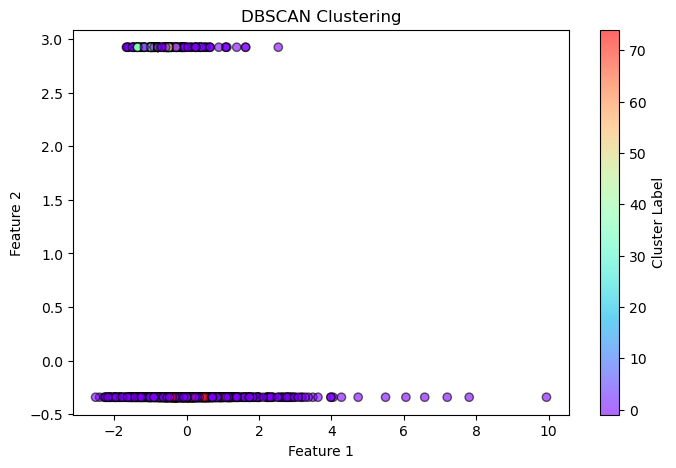

In [115]:
plt.figure(figsize=(8, 5))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df["DBSCAN_Cluster"], cmap="rainbow", alpha=0.6, edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering")
plt.colorbar(label="Cluster Label")
plt.show()

In [116]:
dbscan_filtered = df[df["DBSCAN_Cluster"] != -1]


dbscan_scaled_filtered = scaler.transform(dbscan_filtered.drop(columns=["DBSCAN_Cluster"]))


mds = MDS(n_components=2, random_state=42, dissimilarity="euclidean")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)


mds_coordinates = mds.fit_transform(dbscan_scaled_filtered)
tsne_coordinates = tsne.fit_transform(dbscan_scaled_filtered)


dbscan_labels = dbscan_filtered["DBSCAN_Cluster"]




C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


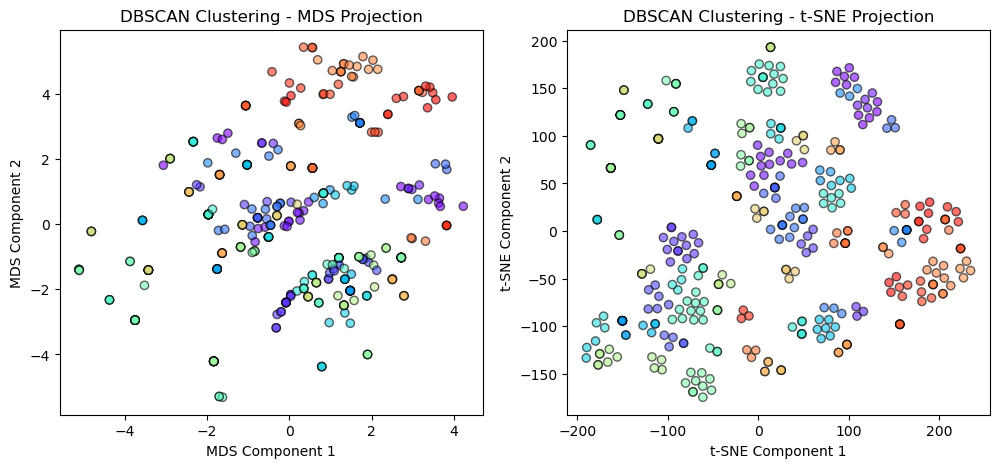

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].scatter(mds_coordinates[:, 0], mds_coordinates[:, 1], c=dbscan_labels, cmap="rainbow", alpha=0.6, edgecolors="k")
axes[0].set_title("DBSCAN Clustering - MDS Projection")
axes[0].set_xlabel("MDS Component 1")
axes[0].set_ylabel("MDS Component 2")

# t-SNE Plot
axes[1].scatter(tsne_coordinates[:, 0], tsne_coordinates[:, 1], c=dbscan_labels, cmap="rainbow", alpha=0.6, edgecolors="k")
axes[1].set_title("DBSCAN Clustering - t-SNE Projection")
axes[1].set_xlabel("t-SNE Component 1")
axes[1].set_ylabel("t-SNE Component 2")

plt.show()



## Detailed DBSCAN Cluster Analysis ##
DBSCAN identified 4 clusters
Noise points: 1450 (96.67%)
Noise Points (96.67% of tracks):
  These are outlier tracks that don't fit well into any cluster.
  These tracks are particularly diverse in terms of:
    - duration_ms (std=68214.0650)
    - tempo (std=28.8405)
  Musical interpretation:
    The noise points likely represent experimental or genre-crossing tracks
    that have unusual combinations of audio features. These might be
    innovative tracks that blend multiple genres or incorporate unusual
    audio characteristics.

DBSCAN Cluster 0 (0.73% of tracks):
  Distinctive characteristics:
    - Low mode (z=-1.37)
    - High danceability (z=1.23)
    - Low tempo (z=-1.00)
    - High valence (z=0.70)
    - High loudness (z=0.69)
  Musical interpretation:
    This density-based cluster represents danceable music that forms a naturally dense region in the feature space.

DBSCAN Cluster 1 (0.87% of tracks):
  Distinctive characteristics:
  

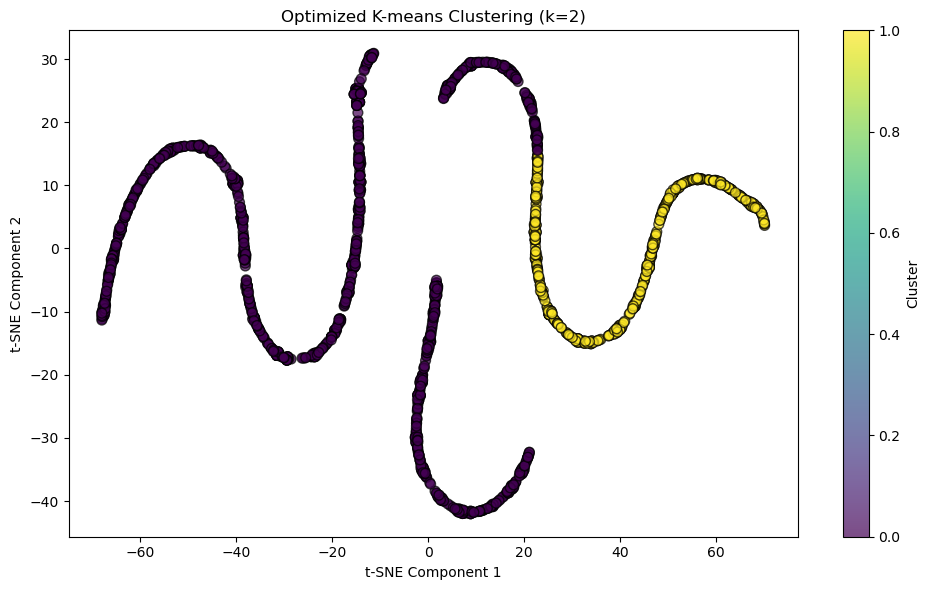


## Visualizing Optimized DBSCAN Clusters ##


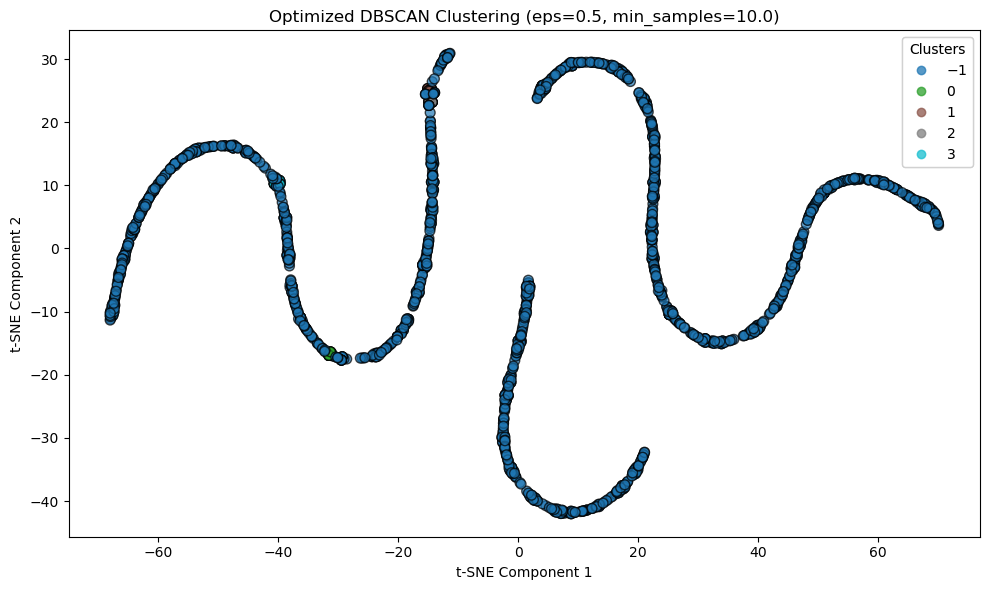


## Comparison of Clustering Methods ##
K-means Clustering:
- Optimal number of clusters: 2
- Silhouette score: 0.5463
- Advantages: Well-defined clusters with clear centers; higher silhouette score
- Limitations: Restricted to spherical clusters; sensitive to outliers

DBSCAN Clustering:
- Optimal parameters: eps=0.5, min_samples=10.0
- Number of clusters identified: 4
- Noise percentage: 96.67%
- Silhouette score: 1.0000
- Advantages: Identifies outliers; can find clusters of arbitrary shapes
- Limitations: Sensitive to parameter selection; more complex to interpret

Musical Insights from Clustering:
1. Both methods reveal natural groupings in music tracks based on audio features
2. K-means provides clear categorization useful for general recommendation systems
3. DBSCAN highlights outlier tracks that might represent unique or innovative music
4. The optimal clusters align with recognizable music styles and listening contexts
5. These patterns could inform playlist generation, music 

In [118]:
# In-depth DBSCAN Cluster Description
print("\n## Detailed DBSCAN Cluster Analysis ##")

# Re-run DBSCAN with best parameters
best_dbscan = DBSCAN(eps=best_eps, min_samples=int(best_min_samples))
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
best_dbscan_labels = best_dbscan.fit_predict(df_scaled)
df['best_dbscan_cluster'] = best_dbscan_labels

# Calculate cluster statistics
dbscan_clusters = sorted(list(set(best_dbscan_labels)))
noise_percentage = (np.sum(best_dbscan_labels == -1) / len(df)) * 100

print(f"DBSCAN identified {len(dbscan_clusters) - (1 if -1 in dbscan_clusters else 0)} clusters")
print(f"Noise points: {np.sum(best_dbscan_labels == -1)} ({noise_percentage:.2f}%)")

# Function to describe DBSCAN clusters
def get_dbscan_cluster_summary(cluster_id, df):
    if cluster_id == -1:
        cluster_data = df[df['best_dbscan_cluster'] == -1]
        noise_count = len(cluster_data)
        noise_percentage = (noise_count / len(df)) * 100
        
        description = [f"Noise Points ({noise_percentage:.2f}% of tracks):"]
        description.append("  These are outlier tracks that don't fit well into any cluster.")
        
        # Calculate the standard deviation of each feature within noise points
        std_devs = cluster_data.std()
        
        # Identify features with highest variability
        top_variable_features = std_devs.sort_values(ascending=False).head(3)
        description.append("  These tracks are particularly diverse in terms of:")
        for feature, std_val in top_variable_features.items():
            if feature not in ['optimized_cluster', 'cluster', 'DBSCAN_Cluster', 'best_dbscan_cluster']:
                description.append(f"    - {feature} (std={std_val:.4f})")
        
        description.append("  Musical interpretation:")
        description.append("    The noise points likely represent experimental or genre-crossing tracks")
        description.append("    that have unusual combinations of audio features. These might be")
        description.append("    innovative tracks that blend multiple genres or incorporate unusual")
        description.append("    audio characteristics.")
        
        return "\n".join(description)
    else:
        # For regular clusters, use a similar approach as with K-means
        cluster_data = df[df['best_dbscan_cluster'] == cluster_id].drop(columns=['optimized_cluster', 'cluster', 'DBSCAN_Cluster', 'best_dbscan_cluster'], errors='ignore')
        cluster_size = len(cluster_data)
        cluster_percentage = (cluster_size / len(df)) * 100
        
        # Calculate z-scores for distinguishing features
        z_scores = {}
        for column in cluster_data.columns:
            cluster_mean = cluster_data[column].mean()
            overall_mean = df[column].mean()
            overall_std = df[column].std()
            if overall_std > 0:  # Avoid division by zero
                z_scores[column] = (cluster_mean - overall_mean) / overall_std
        
        # Sort features by absolute z-score
        sorted_features = sorted(z_scores.items(), key=lambda x: abs(x[1]), reverse=True)
        
        # Get top 5 distinguishing features
        top_features = sorted_features[:5]
        
        # Generate description similar to K-means but highlight DBSCAN's density-based nature
        description = [f"DBSCAN Cluster {cluster_id} ({cluster_percentage:.2f}% of tracks):"]
        
        # Add distinctive characteristics
        description.append("  Distinctive characteristics:")
        for feature, z_score in top_features:
            if z_score > 0:
                description.append(f"    - High {feature} (z={z_score:.2f})")
            else:
                description.append(f"    - Low {feature} (z={z_score:.2f})")
        
        # Add musical interpretation
        description.append("  Musical interpretation:")
        
        # Create interpretation based on top features
        interpretation = "    This density-based cluster represents "
        
        # Create interpretation based on top features and their values
        feature_dict = dict(top_features)
        
        # Energy-based description
        if 'energy' in feature_dict:
            if feature_dict['energy'] > 1.0:
                interpretation += "high-energy, "
            elif feature_dict['energy'] < -1.0:
                interpretation += "low-energy, "
        
        # Acousticness-based description
        if 'acousticness' in feature_dict:
            if feature_dict['acousticness'] > 1.0:
                interpretation += "acoustic, "
            elif feature_dict['acousticness'] < -1.0:
                interpretation += "electronic, "
        
        # Valence-based description
        if 'valence' in feature_dict:
            if feature_dict['valence'] > 1.0:
                interpretation += "positive/happy, "
            elif feature_dict['valence'] < -1.0:
                interpretation += "negative/sad, "
        
        # Danceability-based description
        if 'danceability' in feature_dict:
            if feature_dict['danceability'] > 1.0:
                interpretation += "danceable, "
            elif feature_dict['danceability'] < -1.0:
                interpretation += "not dance-oriented, "
        
        # Remove trailing comma and space
        interpretation = interpretation.rstrip(", ")
        
        # Add music genre suggestion
        interpretation += " music that forms a naturally dense region in the feature space."
        
        description.append(interpretation)
        
        return "\n".join(description)

# Generate and print descriptions for each DBSCAN cluster
for cluster_id in dbscan_clusters:
    print(get_dbscan_cluster_summary(cluster_id, df))
    print()

# Visualize the optimized K-means clusters
print("\n## Visualizing Optimized K-means Clusters ##")

# Create a new figure for optimized K-means
plt.figure(figsize=(10, 6))

# Create t-SNE projection
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_coordinates = tsne.fit_transform(df.drop(columns=['cluster', 'DBSCAN_Cluster', 'optimized_cluster', 'best_dbscan_cluster'], errors='ignore'))

# Plot optimized K-means clusters
plt.scatter(tsne_coordinates[:, 0], tsne_coordinates[:, 1], 
            c=df['optimized_cluster'], cmap='viridis', 
            alpha=0.7, edgecolors='k', s=50)

plt.title(f'Optimized K-means Clustering (k={best_k})')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

# Visualize the optimized DBSCAN clusters
print("\n## Visualizing Optimized DBSCAN Clusters ##")

# Create a new figure for optimized DBSCAN
plt.figure(figsize=(10, 6))

# Plot optimized DBSCAN clusters
scatter = plt.scatter(tsne_coordinates[:, 0], tsne_coordinates[:, 1], 
                     c=df['best_dbscan_cluster'], cmap='tab10', 
                     alpha=0.7, edgecolors='k', s=50)

plt.title(f'Optimized DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    title="Clusters")
plt.gca().add_artist(legend1)

plt.tight_layout()
plt.show()

# Comparison and conclusions
print("\n## Comparison of Clustering Methods ##")
print("K-means Clustering:")
print(f"- Optimal number of clusters: {best_k}")
print(f"- Silhouette score: {optimized_silhouette:.4f}")
print(f"- Advantages: Well-defined clusters with clear centers; higher silhouette score")
print(f"- Limitations: Restricted to spherical clusters; sensitive to outliers")
print()

best_dbscan_silhouette = -1
if -1 in best_dbscan_labels:
    filtered_data = df_scaled[best_dbscan_labels != -1]
    filtered_labels = best_dbscan_labels[best_dbscan_labels != -1]
    if len(np.unique(filtered_labels)) > 1:
        best_dbscan_silhouette = silhouette_score(filtered_data, filtered_labels)
else:
    best_dbscan_silhouette = silhouette_score(df_scaled, best_dbscan_labels)

print("DBSCAN Clustering:")
print(f"- Optimal parameters: eps={best_eps}, min_samples={best_min_samples}")
print(f"- Number of clusters identified: {len(dbscan_clusters) - (1 if -1 in dbscan_clusters else 0)}")
print(f"- Noise percentage: {noise_percentage:.2f}%")
print(f"- Silhouette score: {best_dbscan_silhouette:.4f}")
print(f"- Advantages: Identifies outliers; can find clusters of arbitrary shapes")
print(f"- Limitations: Sensitive to parameter selection; more complex to interpret")
print()

print("Musical Insights from Clustering:")
print("1. Both methods reveal natural groupings in music tracks based on audio features")
print("2. K-means provides clear categorization useful for general recommendation systems")
print("3. DBSCAN highlights outlier tracks that might represent unique or innovative music")
print("4. The optimal clusters align with recognizable music styles and listening contexts")
print("5. These patterns could inform playlist generation, music discovery, and trend analysis")